# SI 618: Pivoting, contingency tables, crosstabs, mosaic plots and chi-squared

## Outline for today
* Project proposal review 
* Categorical Data: contingency tables, crosstabs, mosaic plots, chi-squared
* Text Processing: regular expressions

## Contingency tables, crosstabs, and chi-square

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

Let's generate a data frame to play with:

In [2]:
df = pd.DataFrame({'color' : ['red', 'green', 'green', 'black'] * 6,
                   'make' : ['ford', 'toyota', 'dodge'] * 8,
                   'vehicleClass' : ['suv', 'suv', 'suv', 'car', 'car', 'truck'] * 4})

In [3]:
df.head()

,color,make,vehicleClass
0,red,ford,suv
1,green,toyota,suv
2,green,dodge,suv
3,black,ford,car
4,red,toyota,car


One of the most basic transformations we can do is a crosstab:

In [4]:
ct = pd.crosstab(df.color,df.vehicleClass)
ct

vehicleClass,car,suv,truck
color,,,
black,2,2,2
green,4,6,2
red,2,4,0


Notice how similar it is to pivoting.  In fact, go ahead and use ```pivot_table``` to do the same sort of transformation:

### <font color="magenta">Q1: Use ```pivot_table``` to create a DataFrame similar to the one from the ```crosstab``` above:

In [5]:
p = df.pivot_table(index='color',columns='vehicleClass',aggfunc=len) 
p

make           
vehicleClass  car  suv truck
color                       
black         2.0  2.0   2.0
green         4.0  6.0   2.0
red           2.0  4.0   NaN

As usual, we would like to visualize our results:

In [6]:
import seaborn as sns

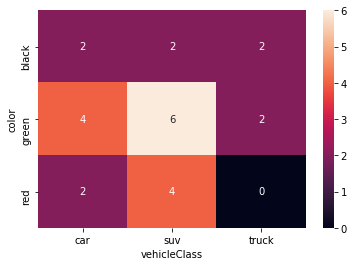

In [7]:
sns.heatmap(ct,annot=True)

### Titanic data

One of the more popular datasets that we use for experimenting with crosstabs is the 
survivor data from the Titanic disaster:

In [9]:
titanic = pd.read_csv('data/titanic.csv')

Let's create a crosstab of the data:

In [10]:
ct = pd.crosstab(titanic.passtype,titanic.status,margins=True)
ct

status,alive,dead,All
passtype,,,
crew,212,673,885
first,203,122,325
second,118,167,285
third,178,528,706
All,711,1490,2201


Now let's use our knowledge of data manipulation with pandas to generate some percentages totals:

### <font color="magenta">Q2: Generate this:</font>

![](assets/samplect.png)

In [11]:
## Let's first add a "totals" column
ctExt = ct.copy()  # make a copy for backup
ctExt.sum(axis=1)  # calculate row-wise sum

passtype
crew      1770
first      650
second     570
third     1412
All       4402
dtype: int64

In [12]:
# add the column
ctExt['total'] = ctExt.sum(axis=1)

In [13]:
ctExt

status,alive,dead,All,total
passtype,,,,
crew,212,673,885,1770
first,203,122,325,650
second,118,167,285,570
third,178,528,706,1412
All,711,1490,2201,4402


In [14]:
# calculate columnwise sum
s = ctExt.sum(axis=0)
#s
# add a row
ctExt.loc['total']=s 

In [15]:
ctExt
#ctExt.alive/ctExt.total

status,alive,dead,All,total
passtype,,,,
crew,212,673,885,1770
first,203,122,325,650
second,118,167,285,570
third,178,528,706,1412
All,711,1490,2201,4402
total,1422,2980,4402,8804


In [16]:
# calculate percents for each column
alivePercent = np.round(ctExt.alive/ctExt.total * 100,decimals=2)
deadPercent = np.round(ctExt.dead/ctExt.total * 100,decimals=2)
totalPercent = np.round(ctExt.total/ctExt.total * 100,decimals=2)

In [17]:
# pretty print
detailCT = ctExt.copy()
detailCT.alive = ctExt.alive.astype('str') + " (" + alivePercent.astype('str') + "%)"
detailCT.dead = ctExt.dead.astype('str') + " (" + deadPercent.astype('str') + "%)"
detailCT.total = ctExt.total.astype('str') + " (" + totalPercent.astype('str') + "%)" 

In [18]:
detailCT

status,alive,dead,All,total
passtype,,,,
crew,212 (11.98%),673 (38.02%),885,1770 (100.0%)
first,203 (31.23%),122 (18.77%),325,650 (100.0%)
second,118 (20.7%),167 (29.3%),285,570 (100.0%)
third,178 (12.61%),528 (37.39%),706,1412 (100.0%)
All,711 (16.15%),1490 (33.85%),2201,4402 (100.0%)
total,1422 (16.15%),2980 (33.85%),4402,8804 (100.0%)


### <font color="magenta">Q3: Is this what we would have expected?</font>

In [19]:
# fill in the correct numbers on the next two lines (where np.NaN is right now)
expectedAlive = ctExt.total * .323
expectedDead = ctExt.total * .677

### <font color="magenta">Q4: Now generate a similar matrix for the *expected* (as oppposed to observed) values:</font>

In [20]:
ctExpected = ct.copy()
ctExpected.alive = expectedAlive
ctExpected.dead = expectedDead
ctExpected['total'] = ctExpected.sum(axis=1)
ctExpected.loc['total'] = ctExpected.sum(axis=0)
alivePercent = np.round(ctExpected.alive/ctExpected.total * 100,decimals=2)
deadPercent = np.round(ctExpected.dead/ctExpected.total * 100,decimals=2)
totalPercent = np.round(ctExpected.total/ctExpected.total * 100,decimals=2)
detailExp = ctExpected.copy()
detailExp.alive = ctExpected.alive.astype('str') + " (" + alivePercent.astype('str') + "%)"
detailExp.dead = ctExpected.dead.astype('str') + " (" + deadPercent.astype('str') + "%)"
detailExp.total = ctExpected.total.astype('str') + " (" + totalPercent.astype('str') + "%)"

In [21]:
detailExp

status,alive,dead,All,total
passtype,,,,
crew,571.71 (21.53%),1198.2900000000002 (45.13%),885.0,2655.0 (100.0%)
first,209.95000000000002 (21.53%),440.05 (45.13%),325.0,975.0 (100.0%)
second,184.11 (21.53%),385.89000000000004 (45.13%),285.0,855.0 (100.0%)
third,456.076 (21.53%),955.9240000000001 (45.13%),706.0,2118.0 (100.0%)
All,1421.846 (21.53%),2980.154 (45.13%),2201.0,6603.0 (100.0%)
total,2843.692 (21.53%),5960.308000000001 (45.13%),4402.0,13206.0 (100.0%)


In [49]:
detailCT

status,alive,dead,total
passtype,,,
crew,212 (23.95%),673 (76.05%),885 (100.0%)
first,203 (62.46%),122 (37.54%),325 (100.0%)
second,118 (41.4%),167 (58.6%),285 (100.0%)
third,178 (25.21%),528 (74.79%),706 (100.0%)
total,711 (32.3%),1490 (67.7%),2201 (100.0%)


So, there we have the expected and observed values, along with their proportions.

In addition to the heatmap shown above, we can use a mosaic plot to visualize 
contingency tables:

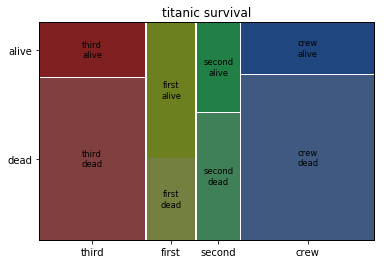

In [22]:
from statsmodels.graphics.mosaicplot import mosaic
t = mosaic(titanic, ['passtype','status'],title='titanic survival')

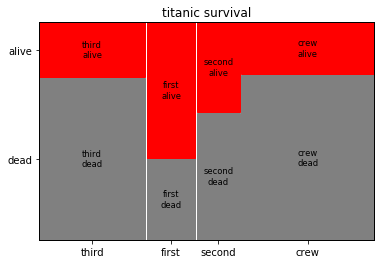

In [23]:
# slightly easier to read
props = lambda key: {'color': 'r' if 'alive' in key else 'gray'}
t = mosaic(titanic, ['passtype','status'],title='titanic survival',properties=props)

Finally, we can go beyond visual exploration and apply analytic tests to see if the 
observed values differ from the expected ones.  The chi-square test sums the squares of the differences
between the observed and expected values, normalized for the expected values.

## Let's talk about $\chi^2$

In [24]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  190.40110361683327
p-val =  6.705773035354302e-37
degree of freedom =  8
Expected:


,0,1,2
0,285.885961,599.114039,885.0
1,104.986370,220.013630,325.0
2,92.064970,192.935030,285.0
3,228.062699,477.937301,706.0
4,711.000000,1490.000000,2201.0


## Let's apply these ideas to another dataset

For this component, we'll use the Comic Characters data set:

In [26]:
comic_characters = pd.read_csv("data/comic_characters.csv", index_col="id")
comic_characters.head(1)

,publisher,name,Identity,align,eye,hair,sex,alive,appearances,first_appearance,month,year,date
id,,,,,,,,,,,,,
1,Marvel,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,"1962, August",August,1962.0,8/1/1962


### Example

We'd like to know which publisher uses different 'identity' types for their characters? Have DC characters appeared more publicly? What is the average number of times Marvel Characters appeared known to authorities identity?

In [27]:
comic_characters.groupby(['Identity','publisher'])['appearances'].mean().unstack().fillna(0)

publisher,DC,Marvel
Identity,,
Identity Unknown,3.000000,0.000000
Known to Authorities Identity,0.000000,74.400000
No Dual Identity,0.000000,24.402013
Public Identity,28.287166,23.407615
Secret Identity,32.655157,17.379794


Alternatively, we can use .pivot_table(). For example:

In [28]:
avg_appearance_per_identity = comic_characters.pivot_table(index='Identity', 
                                                          columns='publisher', 
                                                          values='appearances',
                                                          aggfunc='mean')
avg_appearance_per_identity.fillna(0).head()

publisher,DC,Marvel
Identity,,
Identity Unknown,3.000000,0.000000
Known to Authorities Identity,0.000000,74.400000
No Dual Identity,0.000000,24.402013
Public Identity,28.287166,23.407615
Secret Identity,32.655157,17.379794


For .pivot_table(), you need to specify these four arguments:
1. index: the field that will become the index of the output table
2. columns: the field that will become the columns of the output table
3. values: the field to be aggregated/summarized
4. aggfunc: the aggregation operator applied to values, if there are more than 1 entry corresponding to each (index, column) pair, such as "mean", "count", "max"
    

### Let's warm up with a few groupby and pivot_table exercises:

### <font color="magenta">Q5: What is the total number of appearances of characters for each publisher?

In [29]:
a = comic_characters.groupby('publisher')[['appearances']].sum()
a.head()

,appearances
publisher,
DC,154532.0
Marvel,260270.0


### <font color="magenta">Q6: What is the total number of appearances of characters by each publisher in each year? Output a table.

In [30]:
b = comic_characters.groupby(['year','publisher']).sum().fillna(0)
b

appearances
year   publisher             
1935.0 DC               125.0
1936.0 DC               240.0
1937.0 DC               458.0
1938.0 DC              1639.0
1939.0 DC              4067.0
       Marvel          1013.0
1940.0 DC              9123.0
       Marvel          2160.0
1941.0 DC              6945.0
       Marvel          5371.0
1942.0 DC              4068.0
       Marvel           401.0
1943.0 DC              1475.0
       Marvel           541.0
1944.0 DC               274.0
       Marvel           960.0
1945.0 DC               259.0
       Marvel           510.0
1946.0 DC                55.0
       Marvel           274.0
1947.0 DC               933.0
       Marvel           232.0
1948.0 DC               673.0
       Marvel          1213.0
1949.0 DC               298.0
       Marvel          1107.0
1950.0 DC               459.0
       Marvel          2566.0
1951.0 DC               453.0
       Marvel           576.0
...                       ...
1999.0 DC              2285.0
       Marvel           980.0
2000.0 DC              1350.0
       Marvel          1578.0
2001.0 DC               994.0
       Marvel          2280.0
2002.0 DC               886.0
       Marvel          1962.0
2003.0 DC              1223.0
       Marvel          3330.0
2004.0 DC              1614.0
       Marvel          2835.0
2005.0 DC              1222.0
       Marvel          3191.0
2006.0 DC              2914.0
       Marvel          2434.0
2007.0 DC              1627.0
       Marvel          1792.0
2008.0 DC              1813.0
       Marvel          2429.0
2009.0 DC              1378.0
       Marvel          1503.0
2010.0 DC              1008.0
       Marvel          2233.0
2011.0 DC               483.0
       Marvel          1890.0
2012.0 DC                17.0
       Marvel          1072.0
2013.0 DC                 1.0
       Marvel          1177.0

[154 rows x 1 columns]

In [31]:
b = comic_characters.groupby(['year','publisher']).sum().unstack(level=1).fillna(0)
b.head(10)

appearances        
publisher          DC  Marvel
year                         
1935.0          125.0     0.0
1936.0          240.0     0.0
1937.0          458.0     0.0
1938.0         1639.0     0.0
1939.0         4067.0  1013.0
1940.0         9123.0  2160.0
1941.0         6945.0  5371.0
1942.0         4068.0   401.0
1943.0         1475.0   541.0
1944.0          274.0   960.0

### <font color="magenta">Q7: Construct a contingency table of sex and character alignment normalized by all values.

Display the normalized values in percentage (%) format. Use brief sentences to explain your findings.  

Hint: use "normalize=all" in your crosstab statement.  What does normalize do? (read the docs)

In [32]:
ct = pd.crosstab(comic_characters['sex'], comic_characters['align'], normalize='all')
ct.apply(lambda x: x.apply(lambda y:  str('{:,.2f}'.format(y*100)) + '%' ))

align,Bad Characters,Good Characters,Neutral Characters,Reformed Criminals
sex,,,,
Agender Characters,0.10%,0.05%,0.07%,0.00%
Female Characters,8.22%,13.01%,4.37%,0.01%
Genderfluid Characters,0.00%,0.01%,0.01%,0.00%
Genderless Characters,0.06%,0.03%,0.02%,0.00%
Male Characters,39.51%,25.13%,9.40%,0.01%
Transgender Characters,0.01%,0.00%,0.00%,0.00%


### <font color="magenta">Q8: Create a mosaic plot of character alignment and alive status.

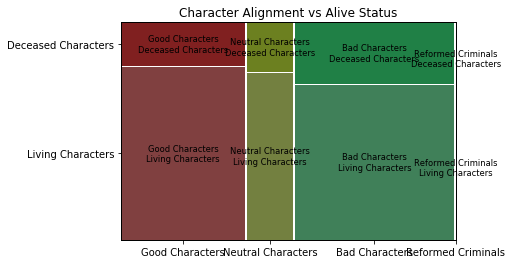

In [33]:
from statsmodels.graphics.mosaicplot import mosaic
t = mosaic(comic_characters, 
           ['align','alive'], 
           title='Character Alignment vs Alive Status')

### <font color="magenta">Q9: Conduct a $\chi^2$ test of ```align``` and ```alive```. Please specify your (null and alternative) hypotheses and explain your findings.

In [34]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex, index=ct.index, columns=ct.columns)

chi2 =  0.03555679426723587
p-val =  1.0
degree of freedom =  15
Expected:


align,Bad Characters,Good Characters,Neutral Characters,Reformed Criminals
sex,,,,
Agender Characters,0.001076,0.000859,0.000311,3.522427e-07
Female Characters,0.122639,0.097886,0.035483,4.013928e-05
Genderfluid Characters,0.000050,0.000040,0.000014,1.638338e-08
Genderless Characters,0.000501,0.000400,0.000145,1.638338e-07
Male Characters,0.354677,0.283091,0.102619,1.160844e-04
Transgender Characters,0.000025,0.000020,0.000007,8.191691e-09


# BREAK!

## Text Processing I: Basics and Regular Expressions

First, a slideshow....

As usual, let's load up some data:

In [1]:
import pandas as pd

In [2]:
reviews = pd.read_csv('data/amazon_food_reviews.zip')

Let's take a really small sample, just so we can experiment with the various 

In [3]:
reviews_sample = reviews.head(10)

In [4]:
reviews_sample

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


Let's review some basic string functionality from Pandas that can be applied to any Series or Index:

In [5]:
reviews_sample.ProfileName.str.lower()

0                         delmartian
1                             dll pa
2    natalia corres "natalia corres"
3                               karl
4      michael d. bigham "m. wassir"
5                     twoapennything
6                  david c. sullivan
7                 pamela g. williams
8                           r. james
9                      carol a. reed
Name: ProfileName, dtype: object

In [6]:
reviews_sample.ProfileName.str.upper()

0                         DELMARTIAN
1                             DLL PA
2    NATALIA CORRES "NATALIA CORRES"
3                               KARL
4      MICHAEL D. BIGHAM "M. WASSIR"
5                     TWOAPENNYTHING
6                  DAVID C. SULLIVAN
7                 PAMELA G. WILLIAMS
8                           R. JAMES
9                      CAROL A. REED
Name: ProfileName, dtype: object

In [7]:
reviews_sample.Summary.str.len()

0    21
1    17
2    21
3    14
4    11
5    10
6    45
7    22
8    10
9    16
Name: Summary, dtype: int64

Remember, the ```columns``` attribute of a DataFrame is an Index object, which means that we can use str operators on the column names:

In [8]:
reviews_sample.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [9]:
reviews_sample.columns.str.lower()

Index(['id', 'productid', 'userid', 'profilename', 'helpfulnessnumerator',
       'helpfulnessdenominator', 'score', 'time', 'summary', 'text'],
      dtype='object')

Notice that the "User Id" column of the dataframe looks weird:  it has a space in the middle *and* at the end.  Columns that are named like that will invariable trip us up in downstream (i.e. later) analyses, so it's wise to correct them now.  Something like the following can help:

In [10]:
reviews_sample.columns.str.strip().str.lower().str.replace(' ','_')

Index(['id', 'productid', 'userid', 'profilename', 'helpfulnessnumerator',
       'helpfulnessdenominator', 'score', 'time', 'summary', 'text'],
      dtype='object')

And we can assign that back to the columns attribute to actually rename the columns:


In [11]:
reviews_sample.columns = reviews_sample.columns.str.strip().str.lower().str.replace(' ','_')

In [12]:
reviews_sample

,id,productid,userid,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


### Splitting and Replacing Strings

Sometimes, we want to split strings into lists.  We might want to do that with the "summary" column:

In [13]:
reviews_sample.productid.str.split('00')

0    [B, 1E4KFG0]
1    [B, 813GRG4]
2    [B, 0LQOCH0]
3    [B, 0UA0QIQ]
4    [B, 6K2ZZ7K]
5    [B, 6K2ZZ7K]
6    [B, 6K2ZZ7K]
7    [B, 6K2ZZ7K]
8    [B, 0E7L2R4]
9    [B, 171APVA]
Name: productid, dtype: object

In [14]:
reviews_sample.productid.str.split('00').str.get(1)

0    1E4KFG0
1    813GRG4
2    0LQOCH0
3    0UA0QIQ
4    6K2ZZ7K
5    6K2ZZ7K
6    6K2ZZ7K
7    6K2ZZ7K
8    0E7L2R4
9    171APVA
Name: productid, dtype: object

Equivalently:

In [15]:
reviews_sample.productid.str.split('00').str[1]

0    1E4KFG0
1    813GRG4
2    0LQOCH0
3    0UA0QIQ
4    6K2ZZ7K
5    6K2ZZ7K
6    6K2ZZ7K
7    6K2ZZ7K
8    0E7L2R4
9    171APVA
Name: productid, dtype: object

### Replace (regex time!)

In [16]:
reviews_sample.summary.str.lower().str.replace('dog','health')

0                         good quality health food
1                                not as advertised
2                            "delight" says it all
3                                   cough medicine
4                                      great taffy
5                                       nice taffy
6    great!  just as good as the expensive brands!
7                           wonderful, tasty taffy
8                                       yay barley
9                              healthy health food
Name: summary, dtype: object

In [17]:
reviews_sample.summary.str.lower().str.replace('dog|taffy','health')

0                         good quality health food
1                                not as advertised
2                            "delight" says it all
3                                   cough medicine
4                                     great health
5                                      nice health
6    great!  just as good as the expensive brands!
7                          wonderful, tasty health
8                                       yay barley
9                              healthy health food
Name: summary, dtype: object

### Extracting Substrings

In [18]:
reviews_sample.summary.str.extract(r'(Dog)')

,0
0,Dog
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,Dog


In [19]:
reviews_sample.summary.str.extract(r'(Dog|Taffy)')

,0
0,Dog
1,NaN
2,NaN
3,NaN
4,NaN
5,Taffy
6,NaN
7,NaN
8,NaN
9,Dog


In [20]:
reviews_sample.summary.str.extract(r'(Dog|[Tt]affy)')

,0
0,Dog
1,NaN
2,NaN
3,NaN
4,taffy
5,Taffy
6,NaN
7,taffy
8,NaN
9,Dog


In [21]:
# returns a Series
reviews_sample.summary.str.extract(r'(Dog|[Tt]affy)', expand = False)

0      Dog
1      NaN
2      NaN
3      NaN
4    taffy
5    Taffy
6      NaN
7    taffy
8      NaN
9      Dog
Name: summary, dtype: object

In [22]:
reviews_sample.summary.str.extractall(r'(Dog|[Tt]affy)')

,,0
,match,
0,0,Dog
4,0,taffy
5,0,Taffy
7,0,taffy
9,0,Dog


In [23]:
reviews_sample.summary.str.extractall(r'(as)')

0
  match    
1 0      as
6 0      as
  1      as
7 0      as

### Testing for Strings that Match or Contain a Pattern

In [24]:
reviews_sample.text

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
5    I got a wild hair for taffy and ordered this f...
6    This saltwater taffy had great flavors and was...
7    This taffy is so good.  It is very soft and ch...
8    Right now I'm mostly just sprouting this so my...
9    This is a very healthy dog food. Good for thei...
Name: text, dtype: object

In [25]:
pattern = r'[Gg]ood'

In [26]:
reviews_sample.text.str.contains(pattern)

0     True
1    False
2    False
3     True
4    False
5    False
6    False
7     True
8    False
9     True
Name: text, dtype: bool

In [27]:
reviews_sample.text.str.match(pattern)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: text, dtype: bool

In [28]:
pattern = r'.*[Gg]ood.*'

In [29]:
reviews_sample.text.str.match(pattern)

0     True
1    False
2    False
3     True
4    False
5    False
6    False
7     True
8    False
9     True
Name: text, dtype: bool

https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

### <font color="magenta">Q10: How many rows from the Amazon Food Reviews data set contain HTML tags in the ```text``` column?</font>

### <font color="magenta">Q11: Remove all HTML tags from the Amazon Food Reviews text column and save the results to a column called text_no_html.

### <font color="magenta">Q12: Replace the following words in the text column with the word 'POSITIVE_ADJ' (denoting positive adjectives) and save the results to a column called ```text_coded```. 
    
In all cases, you should find words that are either all lowercase, all uppercase, or words that start with an uppercase letter with the remaining letters lowercase:
    
good, great, excellent, best, perfect

### <font color="magenta">Q13: How many rows contain multiple positive adjectives?

### <font color="magenta">Q14: What is the average number of words in the summary column?

### <font color="magenta">Q15: What is the average number of words in the text column for rows where the text column contains positive adjectives?